In [2]:
from google.colab import drive # # Import the google.colab.drive library

drive.mount('/content/drive') # Mount Google Drive to the runtime environment

Mounted at /content/drive


In [4]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU , Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [5]:
# Data path
path_data = "/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/NLP/RNN/jena_climate_2009_2016 GRU /jena_climate_2009_2016.csv"

In [6]:
# Reading data
data = pd.read_csv(path_data,index_col = ["Date Time"])

# Data information

In [7]:
data.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
# Data dimensions
data.shape

(420551, 14)

In [9]:
# The names of the data columns
data.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [10]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420551 entries, 01.01.2009 00:10:00 to 01.01.2017 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1+ MB


In [11]:
# Nan data review
data.isna().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

# Data preparation

In [12]:
# # Convert the index to datetime format with the format "%d.%m.%Y %H:%M:%S"

data.index = pd.to_datetime(data.index,format="%d.%m.%Y %H:%M:%S")

In [13]:
# Select a subset of the data where the minute is 0 and the hour is divisible by 3
data = data[(data.index.minute == 0) & (data.index.hour %3 == 0)]

In [14]:
temp = data["Tdew (degC)"] # Store the "Tdew (degC)" column in the variable `temp`

var = data.drop(columns=["Tdew (degC)","Tpot (K)"])  # Drop the "Tdew (degC)" and "Tpot (K)" columns from the DataFrame

var #Print the DataFrame

,p (mbar),T (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,
2009-01-01 03:00:00,996.84,-8.81,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 06:00:00,997.71,-9.67,92.70,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 09:00:00,999.69,-7.66,91.20,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2
2009-01-01 12:00:00,1000.30,-6.87,89.60,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.4
2009-01-01 15:00:00,999.88,-5.69,90.40,3.99,3.61,0.38,2.25,3.61,1300.51,1.17,1.88,134.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 12:00:00,1004.76,-1.19,70.20,5.60,3.93,1.67,2.44,3.91,1285.09,0.86,1.56,211.2
2016-12-31 15:00:00,1003.12,5.09,55.34,8.78,4.86,3.92,3.02,4.85,1253.58,0.30,0.70,134.1
2016-12-31 18:00:00,1002.27,-0.08,69.81,6.07,4.24,1.83,2.64,4.23,1276.52,0.39,1.04,220.7


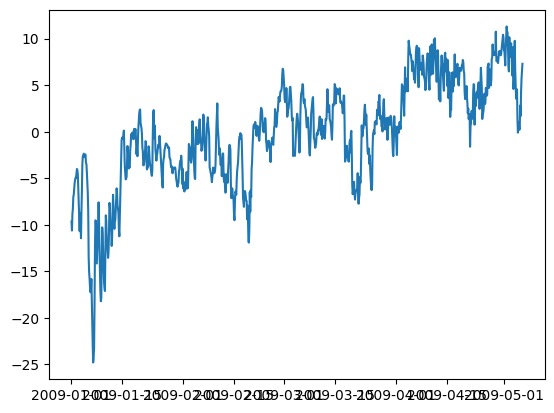

In [ ]:
plt.plot(temp[:1000])  # Plot the first 1000 points of the `temp` variable
plt.show()



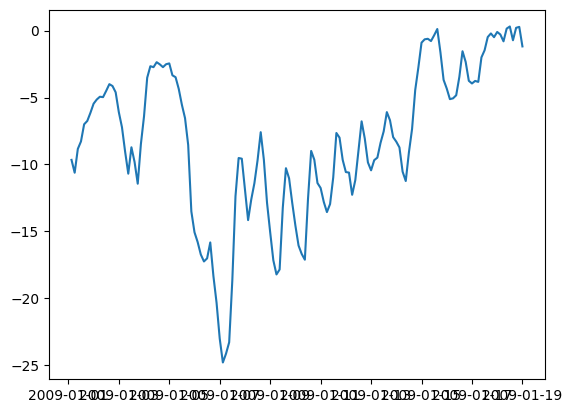

In [ ]:
plt.plot(temp[:144]) # Plot the first 144 points of the `temp` variable
plt.show()


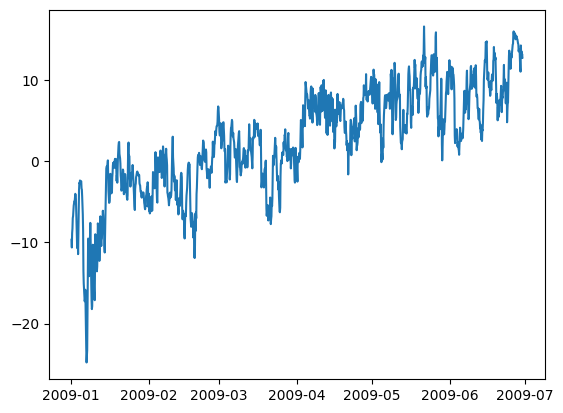

In [ ]:
plt.plot(temp[:1440]) # Plot the first 1440 points of the `temp` variable

plt.show()


In [ ]:
var

,p (mbar),T (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,
2009-01-01 03:00:00,996.84,-8.81,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 06:00:00,997.71,-9.67,92.70,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 09:00:00,999.69,-7.66,91.20,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2
2009-01-01 12:00:00,1000.30,-6.87,89.60,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.4
2009-01-01 15:00:00,999.88,-5.69,90.40,3.99,3.61,0.38,2.25,3.61,1300.51,1.17,1.88,134.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 12:00:00,1004.76,-1.19,70.20,5.60,3.93,1.67,2.44,3.91,1285.09,0.86,1.56,211.2
2016-12-31 15:00:00,1003.12,5.09,55.34,8.78,4.86,3.92,3.02,4.85,1253.58,0.30,0.70,134.1
2016-12-31 18:00:00,1002.27,-0.08,69.81,6.07,4.24,1.83,2.64,4.23,1276.52,0.39,1.04,220.7


In [ ]:
scaler = StandardScaler() # # Create a StandardScaler object
var = scaler.fit_transform(var) # Standardize the values of the DataFrame `var`

In [ ]:
seq_len = 56 # 7days | 8 seq --> 7*8 = 56  |  Number of sequences
step = 2

In [ ]:
# Create empty lists to store sequences and targets
sequences = []
targets = []

# Iterate over the data
for i in range(0,len(data)-seq_len-7,step):

    # Extract a sequence of length `seq_len` from `var` starting at `i`
    seq = var[i:i+seq_len]

    # Extract the target value 7 steps ahead of `seq` from `temp`
    target = temp[i+seq_len+7]

    # Append the sequence to the `sequences` list
    sequences.append(seq)

    # Append the target to the `targets` list
    targets.append(target)


# Convert the lists to NumPy arrays
sequences,targets = np.array(sequences),np.array(targets)


# model

In [ ]:
sequences.shape

(11650, 56, 12)

In [ ]:
# Split the data into training, validation, and test sets
X_train,X_val, X_test = sequences[:8000],sequences[8000:9500],sequences[9500:]
y_train,y_val, y_test = targets[:8000],targets[8000:9500],targets[9500:]

In [ ]:
# Create a deep RNN with 4 GRU layers for learning long-term dependencies

model = Sequential()
model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,input_shape = (56,12),return_sequences=True))
model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,dropout=0.3,return_sequences=True))
model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,dropout=0.3,return_sequences=True))
model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="linear"))

In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 56, 128)           54528     
                                                                 
 gru_7 (GRU)                 (None, 56, 128)           99072     
                                                                 
 gru_8 (GRU)                 (None, 56, 128)           99072     
                                                                 
 gru_9 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
# Define an Adam optimizer with a learning rate of 0.001
opt = tf.optimizers.Adam(learning_rate=0.001)

# Define the Mean Absolute Error loss function
loss = tf.losses.MeanAbsoluteError()

# Compile the model with the optimizer and loss function
model.compile(optimizer=opt,loss=loss)

In [ ]:
# Fit the model to the training data
model.fit(X_train,y_train,batch_size=50,epochs=20,validation_data=(X_val,y_val),verbose = 2)

Epoch 1/20
160/160 - 63s - loss: 3.2276 - val_loss: 2.3086 - 63s/epoch - 396ms/step
Epoch 2/20
160/160 - 53s - loss: 2.6160 - val_loss: 2.2199 - 53s/epoch - 333ms/step
Epoch 3/20
160/160 - 54s - loss: 2.5529 - val_loss: 2.2042 - 54s/epoch - 336ms/step
Epoch 4/20
160/160 - 54s - loss: 2.5282 - val_loss: 2.2244 - 54s/epoch - 335ms/step
Epoch 5/20
160/160 - 54s - loss: 2.4727 - val_loss: 2.3655 - 54s/epoch - 336ms/step
Epoch 6/20
160/160 - 54s - loss: 2.5030 - val_loss: 2.0669 - 54s/epoch - 336ms/step
Epoch 7/20
160/160 - 54s - loss: 2.4675 - val_loss: 2.0951 - 54s/epoch - 335ms/step
Epoch 8/20
160/160 - 55s - loss: 2.5096 - val_loss: 2.1292 - 55s/epoch - 346ms/step
Epoch 9/20
160/160 - 56s - loss: 2.4475 - val_loss: 2.1263 - 56s/epoch - 351ms/step
Epoch 10/20
160/160 - 55s - loss: 2.4678 - val_loss: 2.1172 - 55s/epoch - 346ms/step
Epoch 11/20
160/160 - 54s - loss: 2.4218 - val_loss: 2.1682 - 54s/epoch - 339ms/step
Epoch 12/20
160/160 - 54s - loss: 2.4121 - val_loss: 2.0884 - 54s/epoch - 

In [ ]:
# Evaluate the model on the test dataset
model.evaluate(X_test,y_test)

68/68 [==============================] - 5s 56ms/step - loss: 2.0809


2.080927848815918

In [ ]:
# Predict the target values using the model and store the results in the variable `m_ped_test_d`
m_ped_test_d = model.predict(X_test)

68/68 [==============================] - 4s 55ms/step


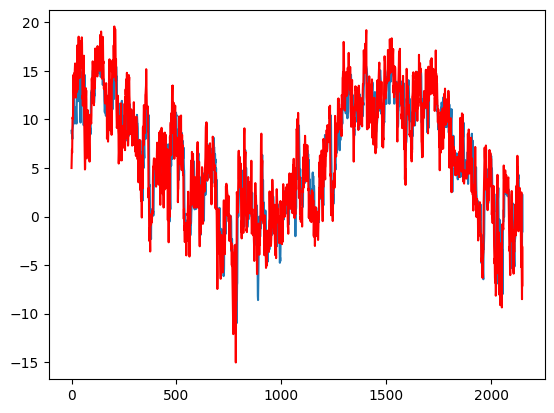

In [ ]:
# Plot the predicted values
plt.plot(m_ped_test_d)

# Plot the actual values in red
plt.plot(y_test,color = "red")

In [ ]:
# save model
model.save("/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/NLP/RNN/jena_climate_2009_2016 GRU/model_weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
